<a href="https://colab.research.google.com/github/Garima27dec/Emotion-Detection-with-Multiple-Data-Streams/blob/main/NLP_Text_Sentiment_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [74]:
import numpy as np
import pandas as pd
import os


In [75]:
df = pd.read_csv("/content/drive/MyDrive/Emotion_Recognition/Text_ER/train.txt",sep=";",
    names=["Description","Emotion"])
df.head(5)

,Description,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [76]:
df['Emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In [77]:
df['Emotion'] = df['Emotion'].replace(["joy","sadness","anger","love","fear","surprise"], ["positive","negative","negative","positive","negative","positive"])

In [78]:
df['Emotion'].value_counts()

negative    8762
positive    7238
Name: Emotion, dtype: int64

In [80]:
df['label_num'] = df['Emotion'].map({
    'negative': 1,
    'positive': 2
})

df.head(5)

,Description,Emotion,label_num
0,i didnt feel humiliated,negative,1
1,i can go from feeling so hopeless to so damned...,negative,1
2,im grabbing a minute to post i feel greedy wrong,negative,1
3,i am ever feeling nostalgic about the fireplac...,positive,2
4,i am feeling grouchy,negative,1


In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.Description,df.label_num,test_size=0.2)

In [82]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (12800,)
Shape of X_test:  (3200,)


In [83]:
y_train.value_counts()

1    7022
2    5778
Name: label_num, dtype: int64

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.87      0.85      1740
           2       0.84      0.79      0.81      1460

    accuracy                           0.83      3200
   macro avg       0.84      0.83      0.83      3200
weighted avg       0.83      0.83      0.83      3200



In [85]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.89      0.94      0.92      1740
           2       0.92      0.87      0.89      1460

    accuracy                           0.91      3200
   macro avg       0.91      0.90      0.91      3200
weighted avg       0.91      0.91      0.91      3200



In [86]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1633,  107],
       [ 192, 1268]])

Text(95.72222222222221, 0.5, 'Truth')

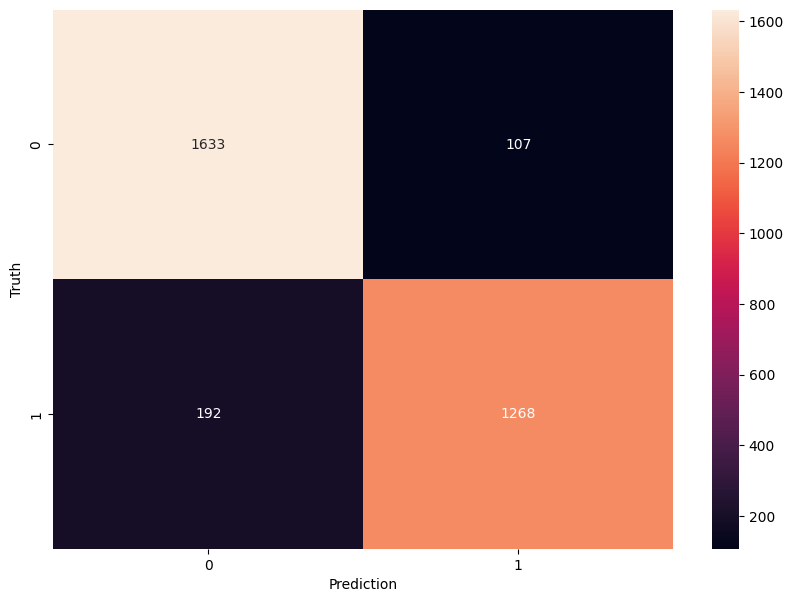

In [87]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')